<a href="https://colab.research.google.com/github/aaakash06/PRODIGY_ML_1/blob/main/House_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import zipfile
import os

zip_path = '/content/house-prices-advanced-regression-techniques.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall()





In [123]:
import pandas as pd

test_data = pd.read_csv("/content/data/test.csv")
train_data = pd.read_csv("/content/data/train.csv")

In [124]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [125]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [126]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [127]:
with open("/content/data/data_description.txt", "r") as f:
    content = f.read()
    print(content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [128]:
# Calculate total square footage
train_data['SquareFootage'] = train_data['1stFlrSF'] + train_data['2ndFlrSF'] + train_data['TotalBsmtSF']

# Calculate total number of bathrooms (full bath counts as 1, half bath counts as 0.5)
train_data['Bathrooms'] = train_data['FullBath'] + train_data['HalfBath'] * 0.5 + train_data['BsmtFullBath'] + train_data['BsmtHalfBath'] * 0.5

# Total number of bedrooms
train_data["Bedrooms"] = train_data["BedroomAbvGr"]

In [129]:
y = train_data["SalePrice"]

In [130]:
X = train_data.iloc[:,-3:]


In [131]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.values, y)

LinearRegression()

In [132]:
train_df = X.copy()
train_df['SalePrice'] = y
train_df.head()

,SquareFootage,Bathrooms,Bedrooms,SalePrice
0,2566,3.5,3,208500
1,2524,2.5,3,181500
2,2706,3.5,3,223500
3,2473,2.0,3,140000
4,3343,3.5,4,250000


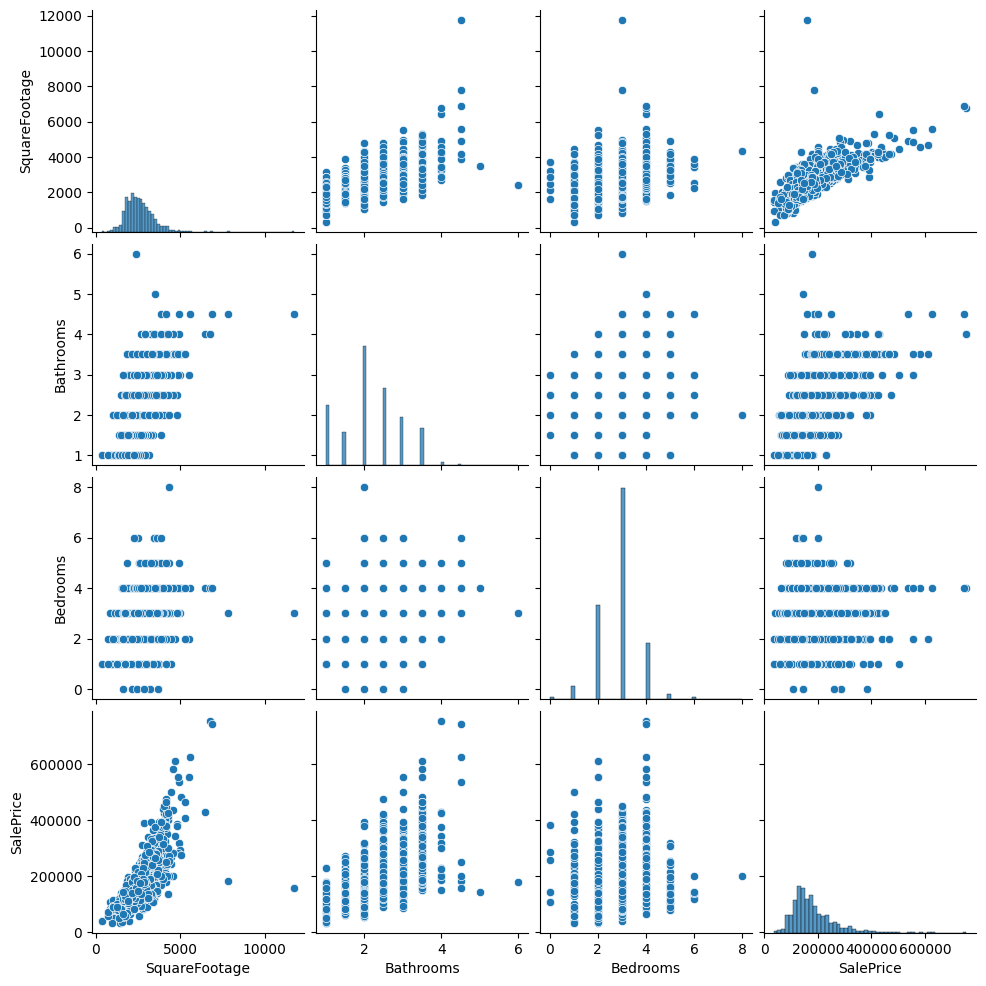

In [133]:
import seaborn as sns
sns.pairplot(train_df)

<Axes: >

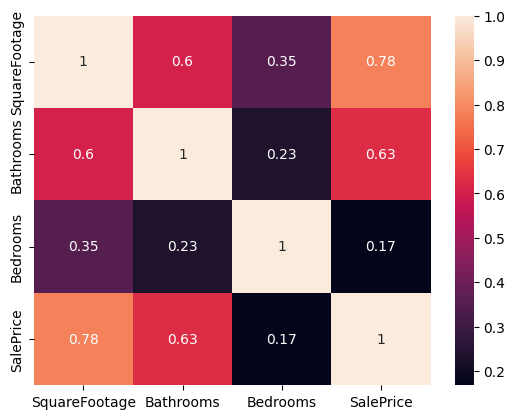

In [134]:
sns.heatmap(train_df.corr(), annot=True)

<ipython-input-135-bb34b17ac4df>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

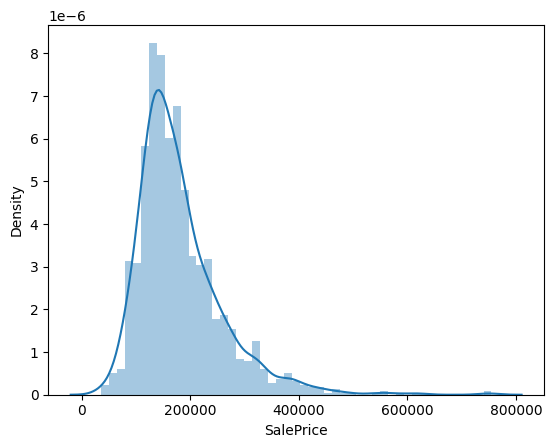

In [135]:

sns.distplot(train_df['SalePrice'])

In [136]:

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X,y)

LinearRegression()

In [137]:

print(lm.intercept_)

-7030.980488425179


In [138]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
SquareFootage,65.207084
Bathrooms,25769.230440
Bedrooms,-12699.894063


In [139]:
# Calculate total square footage
test_data['SquareFootage'] = test_data['1stFlrSF'] + test_data['2ndFlrSF'] + test_data['TotalBsmtSF']

# Calculate total number of bathrooms (full bath counts as 1, half bath counts as 0.5)
test_data['Bathrooms'] = test_data['FullBath'] + test_data['HalfBath'] * 0.5 + test_data['BsmtFullBath'] + test_data['BsmtHalfBath'] * 0.5

# Total number of bedrooms
test_data["Bedrooms"] = test_data["BedroomAbvGr"]

In [140]:
test_data["SalePrice"] = pd.read_csv("/content/data/sample_submission.csv")["SalePrice"]

In [141]:
test_data = test_data.iloc[:,-4:]


In [142]:
test_data

,SquareFootage,Bathrooms,Bedrooms,SalePrice
0,1778.0,1.0,2,169277.052498
1,2658.0,1.5,3,187758.393989
2,2557.0,2.5,3,183583.683570
3,2530.0,2.5,3,179317.477511
4,2560.0,2.0,2,150730.079977
...,...,...,...,...
1454,1638.0,1.5,3,167081.220949
1455,1638.0,1.5,3,164788.778231
1456,2448.0,2.0,4,219222.423400
1457,1882.0,1.5,3,184924.279659


In [143]:
null_counts = test_data.isnull().sum()
print(null_counts)

SquareFootage    1
Bathrooms        2
Bedrooms         0
SalePrice        0
dtype: int64


In [144]:
test_data = test_data.dropna()

In [145]:
test_X = test_data.iloc[:,-4:-1]
test_y = test_data["SalePrice"]

In [146]:
test_X

,SquareFootage,Bathrooms,Bedrooms
0,1778.0,1.0,2
1,2658.0,1.5,3
2,2557.0,2.5,3
3,2530.0,2.5,3
4,2560.0,2.0,2
...,...,...,...
1454,1638.0,1.5,3
1455,1638.0,1.5,3
1456,2448.0,2.0,4
1457,1882.0,1.5,3


In [147]:
test_y

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1457, dtype: float64

In [148]:
predictions = lm.predict(test_X)

In [149]:
predictions

array([109276.65701721, 166843.61201484, 186026.92697977, ...,
       153334.84555045, 116242.91490059, 214652.83681631])

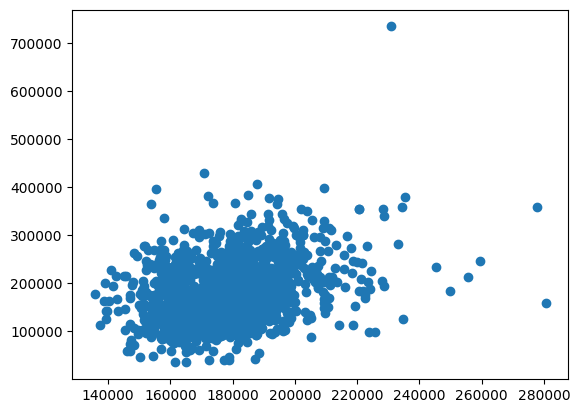

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(test_y,predictions)

<ipython-input-151-3837b4b91ff6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((test_y-predictions),bins=50);


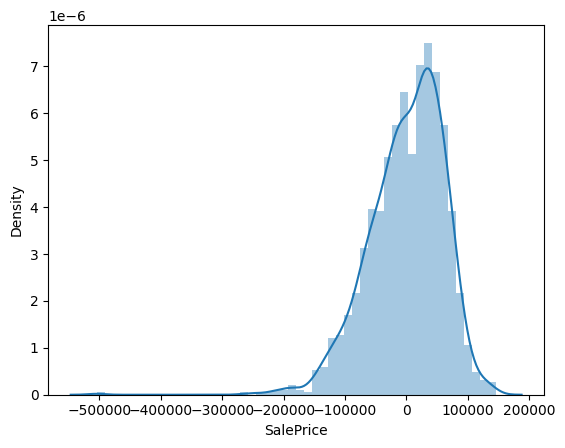

In [151]:
sns.distplot((test_y-predictions),bins=50);

In [152]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, predictions))
print('MSE:', metrics.mean_squared_error(test_y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))


MAE: 47745.67849292792
MSE: 3667537472.003739
RMSE: 60560.197093501425


In [153]:
from sklearn.metrics import r2_score
r2 = r2_score(test_y, predictions)
print(f"R-squared: {r2}")

R-squared: -12.812873793979161


In [155]:
import pickle

with open('model_house.sav', 'wb') as file:
  pickle.dump(lm, file)